In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv(r'crime_data.csv')
df.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


## Applying Descriptive Statistics

In [3]:
df.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  50 non-null     object 
 1   Murder      50 non-null     float64
 2   Assault     50 non-null     int64  
 3   UrbanPop    50 non-null     int64  
 4   Rape        50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [5]:
df.drop(columns=['Unnamed: 0'],inplace=True)


In [6]:
df.head()

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6


In [7]:
## Checking Missing Values

df.isna().sum()

Murder      0
Assault     0
UrbanPop    0
Rape        0
dtype: int64

In [8]:
## Checking For Duplicated values

df.duplicated().sum()

0

# Exploratory Data Analysis

In [9]:
df.head()

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6


## Plotting Histogram

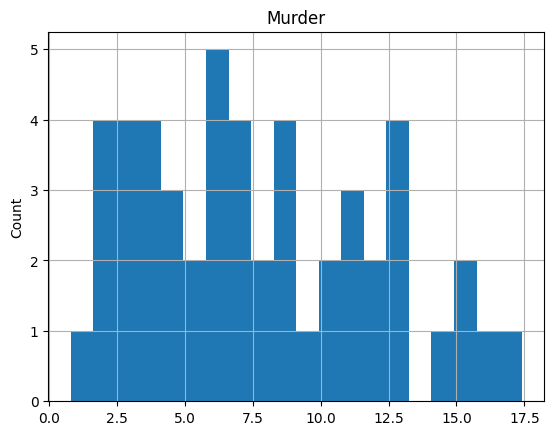

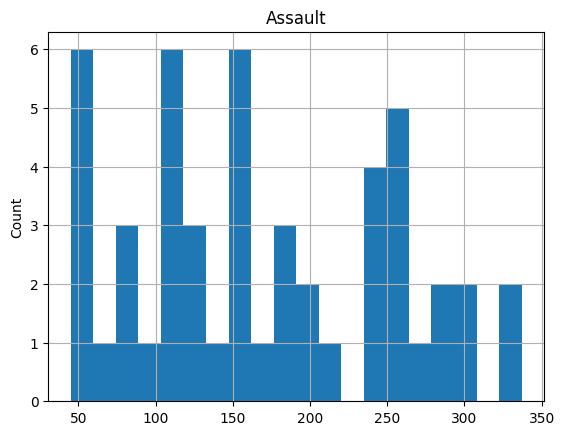

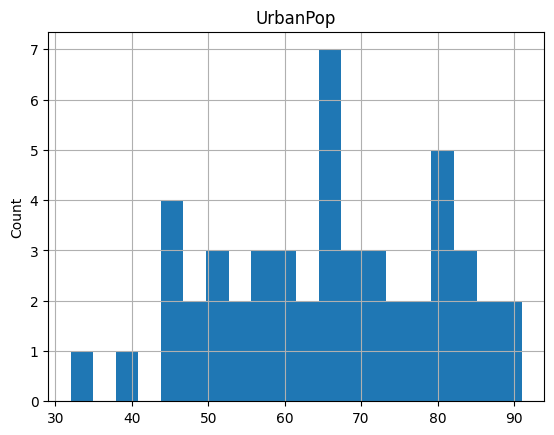

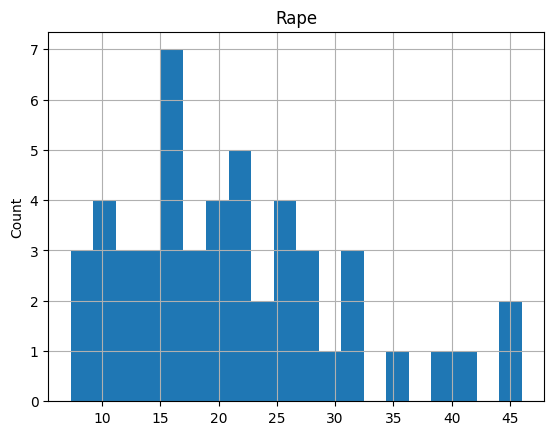

In [10]:
for feature in df.columns:
    df[feature].hist(bins=20)
    plt.ylabel('Count')
    plt.title(feature)
    plt.show()

## Kernel Density Graph

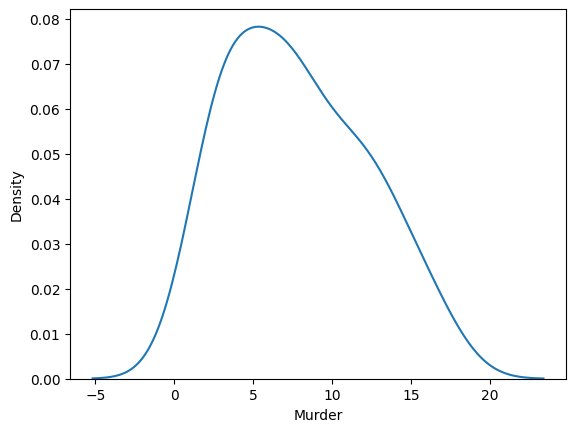

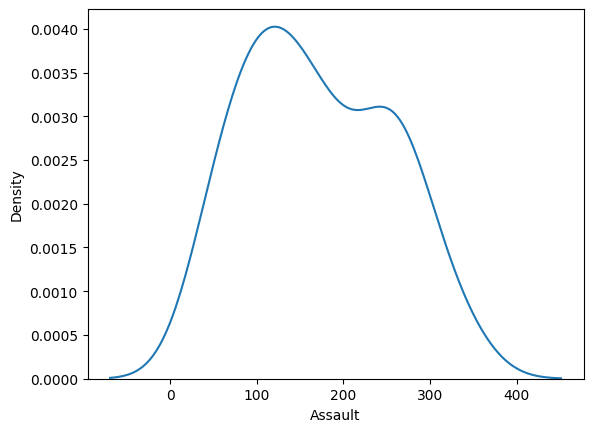

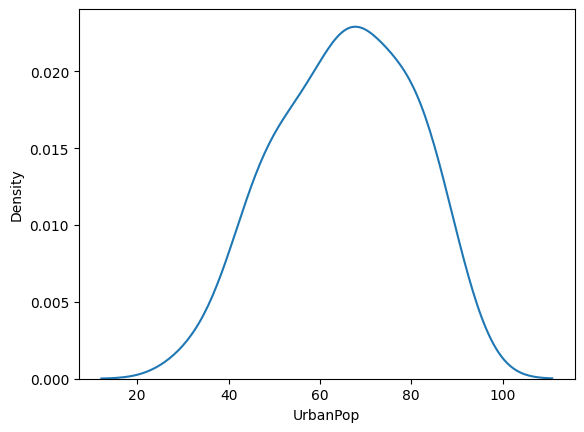

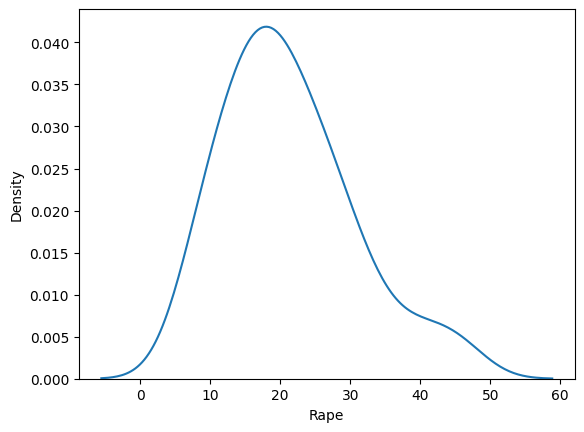

In [11]:
for i in df.columns:
    sns.kdeplot(df[i])
    plt.show()

# Plotting Boxplot

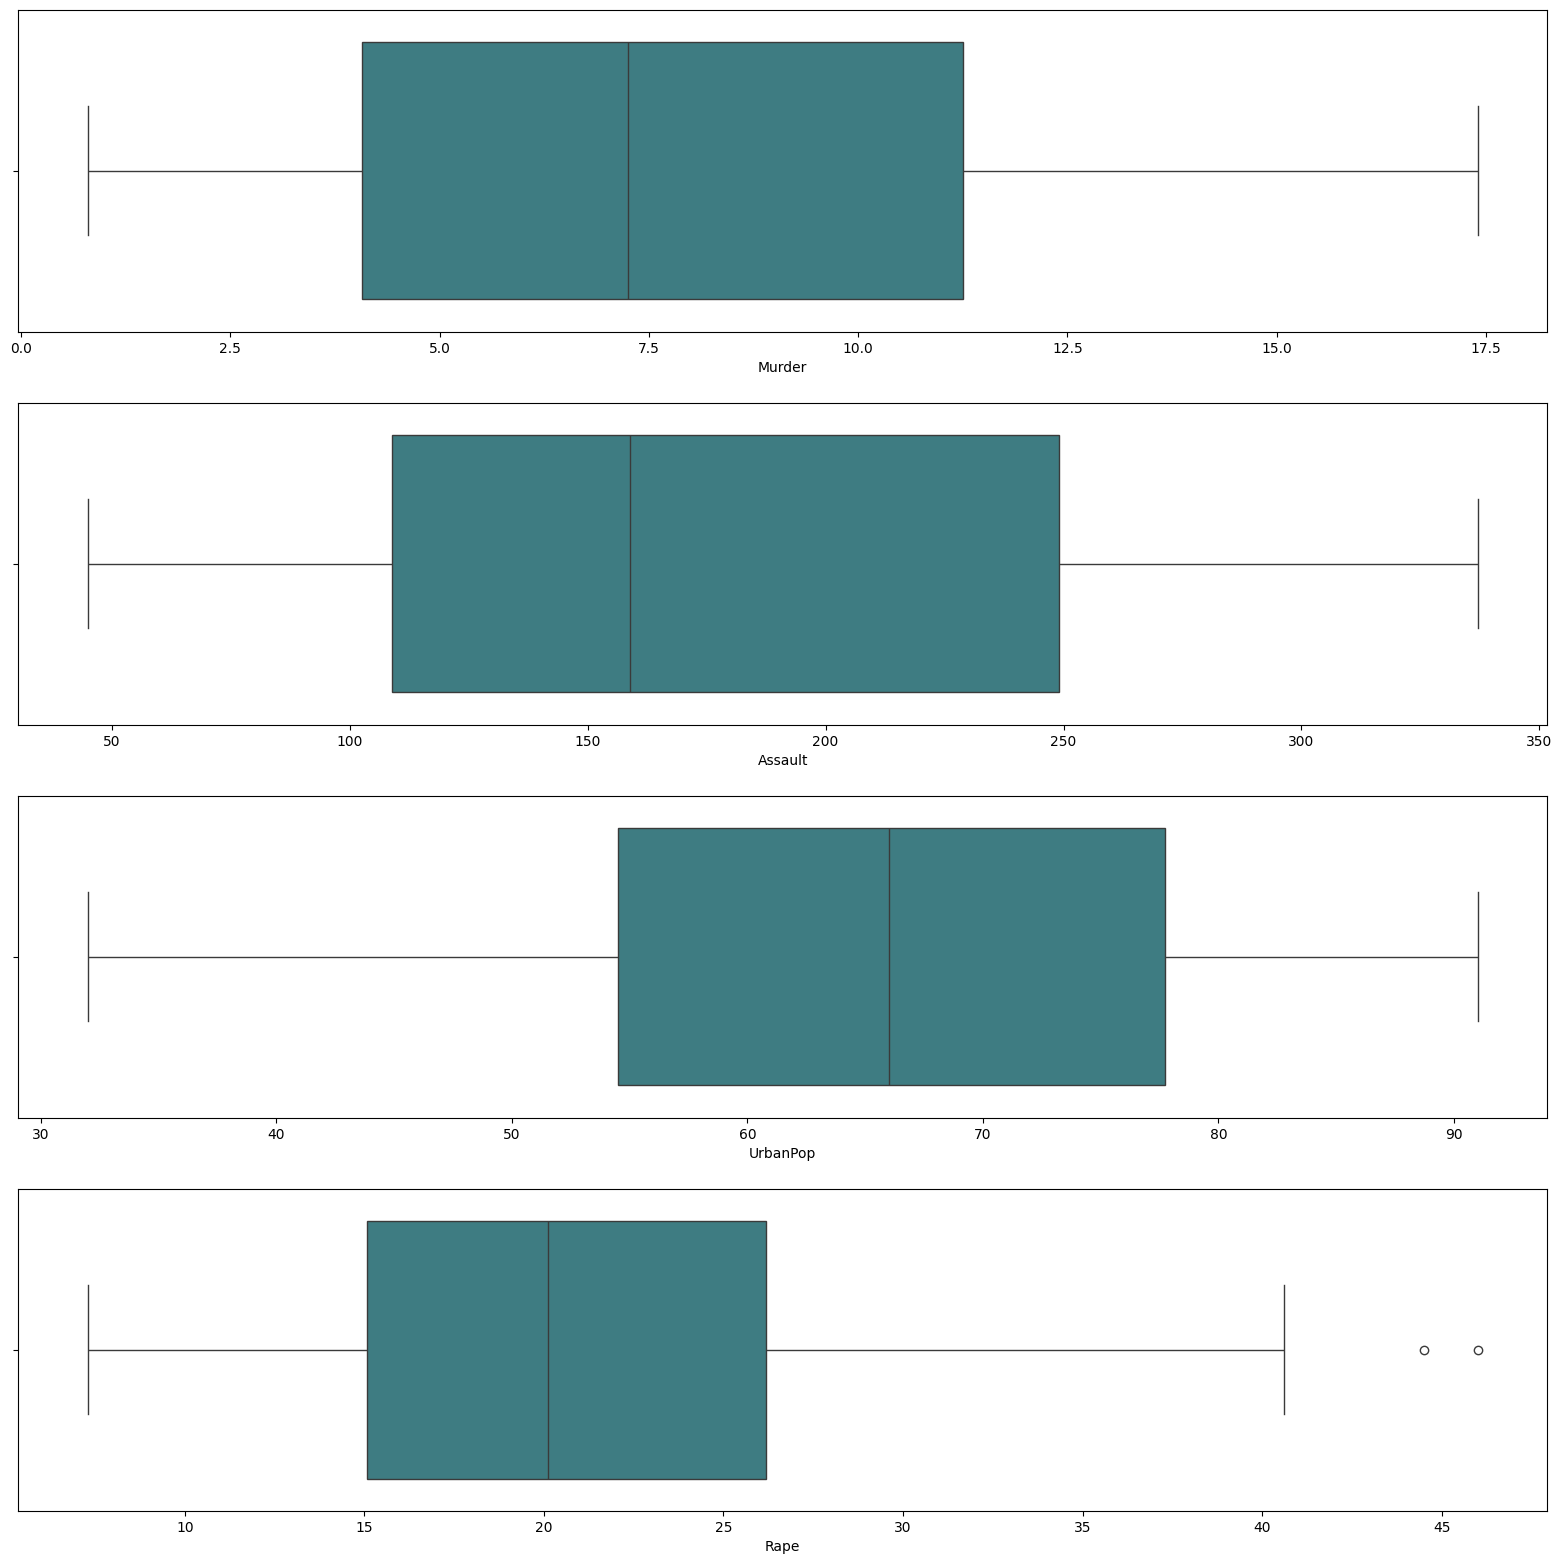

In [12]:
fig,ax=plt.subplots(4,1,figsize=(16,16),sharex=False,sharey=False)
c=0
for i in df.columns:
    sns.boxplot(x=i,data=df,palette='crest',ax=ax[c])
    c+=1
plt.tight_layout(pad=2)


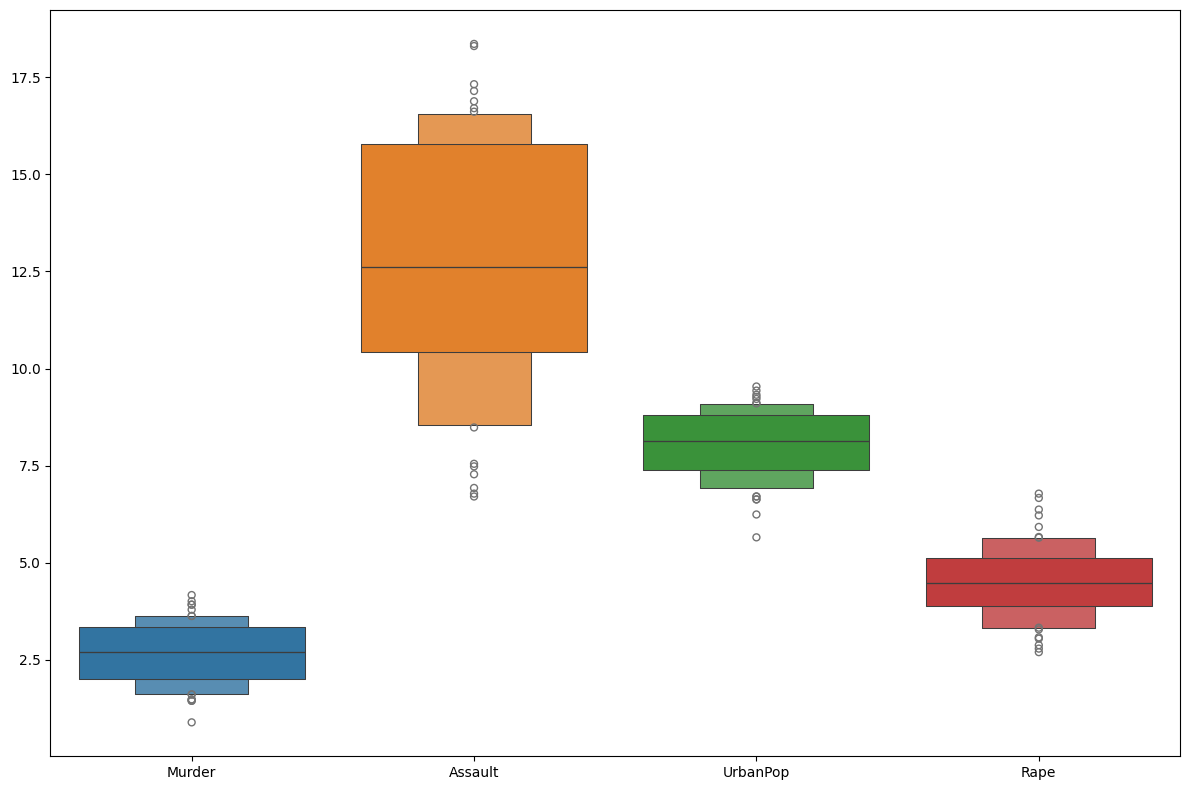

In [13]:
plt.figure(figsize=(12,8))
sns.boxenplot(data=np.sqrt(df))
plt.tight_layout()

# Correlation Analysis

In [14]:
df.corr()

,Murder,Assault,UrbanPop,Rape
Murder,1.000000,0.801873,0.069573,0.563579
Assault,0.801873,1.000000,0.258872,0.665241
UrbanPop,0.069573,0.258872,1.000000,0.411341
Rape,0.563579,0.665241,0.411341,1.000000


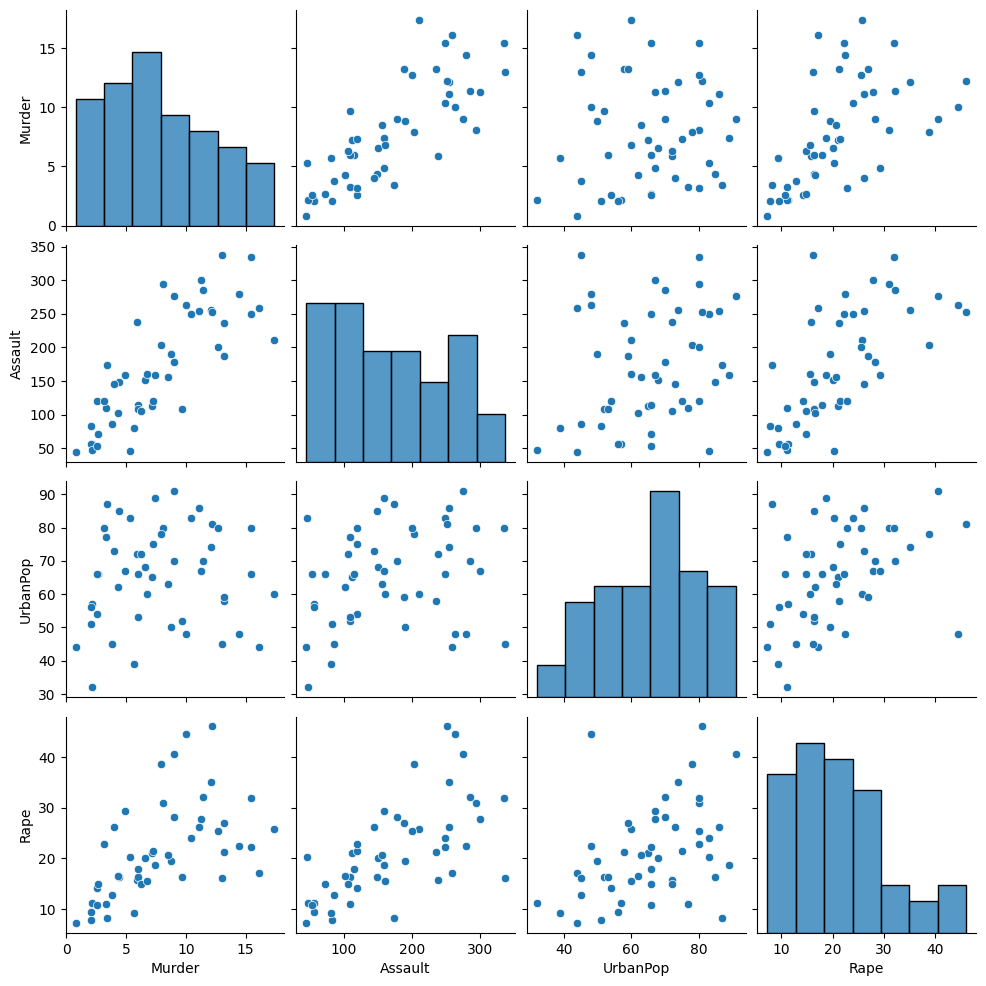

In [15]:
sns.pairplot(df)

<Axes: >

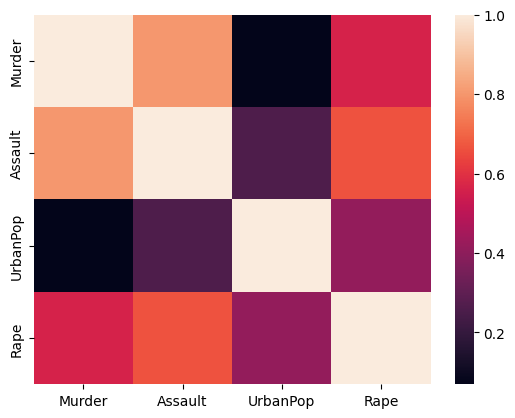

In [16]:
sns.heatmap(df.corr())

# scaling Data or Preprocessing

In [17]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(df)
x

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 ],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293],
       [-0.57702994, -1.51224105,  1.21848371, -0.11129987],
       [-1.20322802, -0.61527217, -0.80534376, -0.75839217],
       [ 0.60578867,  0.94836277,  1.21848371,  0.29852525],
       [-0.13637203, -0.70012057, -0.03768506, -0.0250209 ],
       [-1.29599811, -1.39102904, -0.5959823 , -1.07115345],
       [-0.41468229, -0.67587817,  0.03210209, -0.34856705],
       [ 0.44344101, -0.

# Clustering
### Finding best no of clusters

In [22]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [19]:
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',max_iter=200,random_state=42)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

Text(0, 0.5, 'wcss')

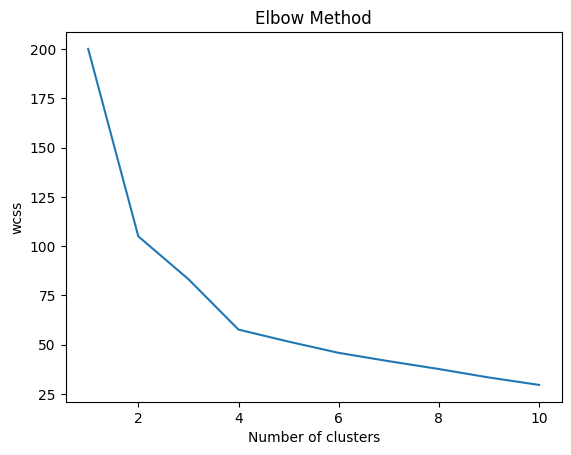

In [20]:
plt.plot(range(1,11),wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('wcss')

### by seeing grapgh we can conclude no of best clusters can be 4

# KMeans MOdel BUilding

In [21]:
kmodel=KMeans(n_clusters=4,random_state=42)
y=kmodel.fit_predict(x)
y

array([1, 2, 2, 1, 2, 2, 3, 3, 2, 1, 3, 0, 2, 3, 0, 3, 0, 1, 0, 2, 3, 2,
       0, 1, 3, 0, 0, 2, 0, 3, 2, 2, 1, 0, 3, 3, 3, 3, 3, 1, 0, 1, 2, 3,
       0, 3, 3, 0, 0, 3])

In [23]:
silhouette_score(x,y)

0.3441080718209351

# Hierarchical Clustering

In [25]:
import numpy as np
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
import scipy.cluster.hierarchy as sch

### Hyperparameter Tunning

In [26]:

def hierarchical_clustering_best(X, max_clusters=10, linkage_methods=['ward', 'complete', 'average', 'single']):
    best_silhouette_score = -1
    best_model = None
    best_num_clusters = None
    best_linkage_method = None
    
    for linkage_method in linkage_methods:
        for n_clusters in range(2, max_clusters + 1):
            model = AgglomerativeClustering(n_clusters=n_clusters, linkage=linkage_method)
            labels = model.fit_predict(X)
            silhouette = silhouette_score(X, labels)
            
            if silhouette > best_silhouette_score:
                best_silhouette_score = silhouette
                best_model = model
                best_num_clusters = n_clusters
                best_linkage_method = linkage_method
                
    return best_model, best_num_clusters, best_linkage_method

In [27]:
hierarchical_clustering_best(x)

(AgglomerativeClustering(linkage='average'), 2, 'average')

## Building Agglomerative Model

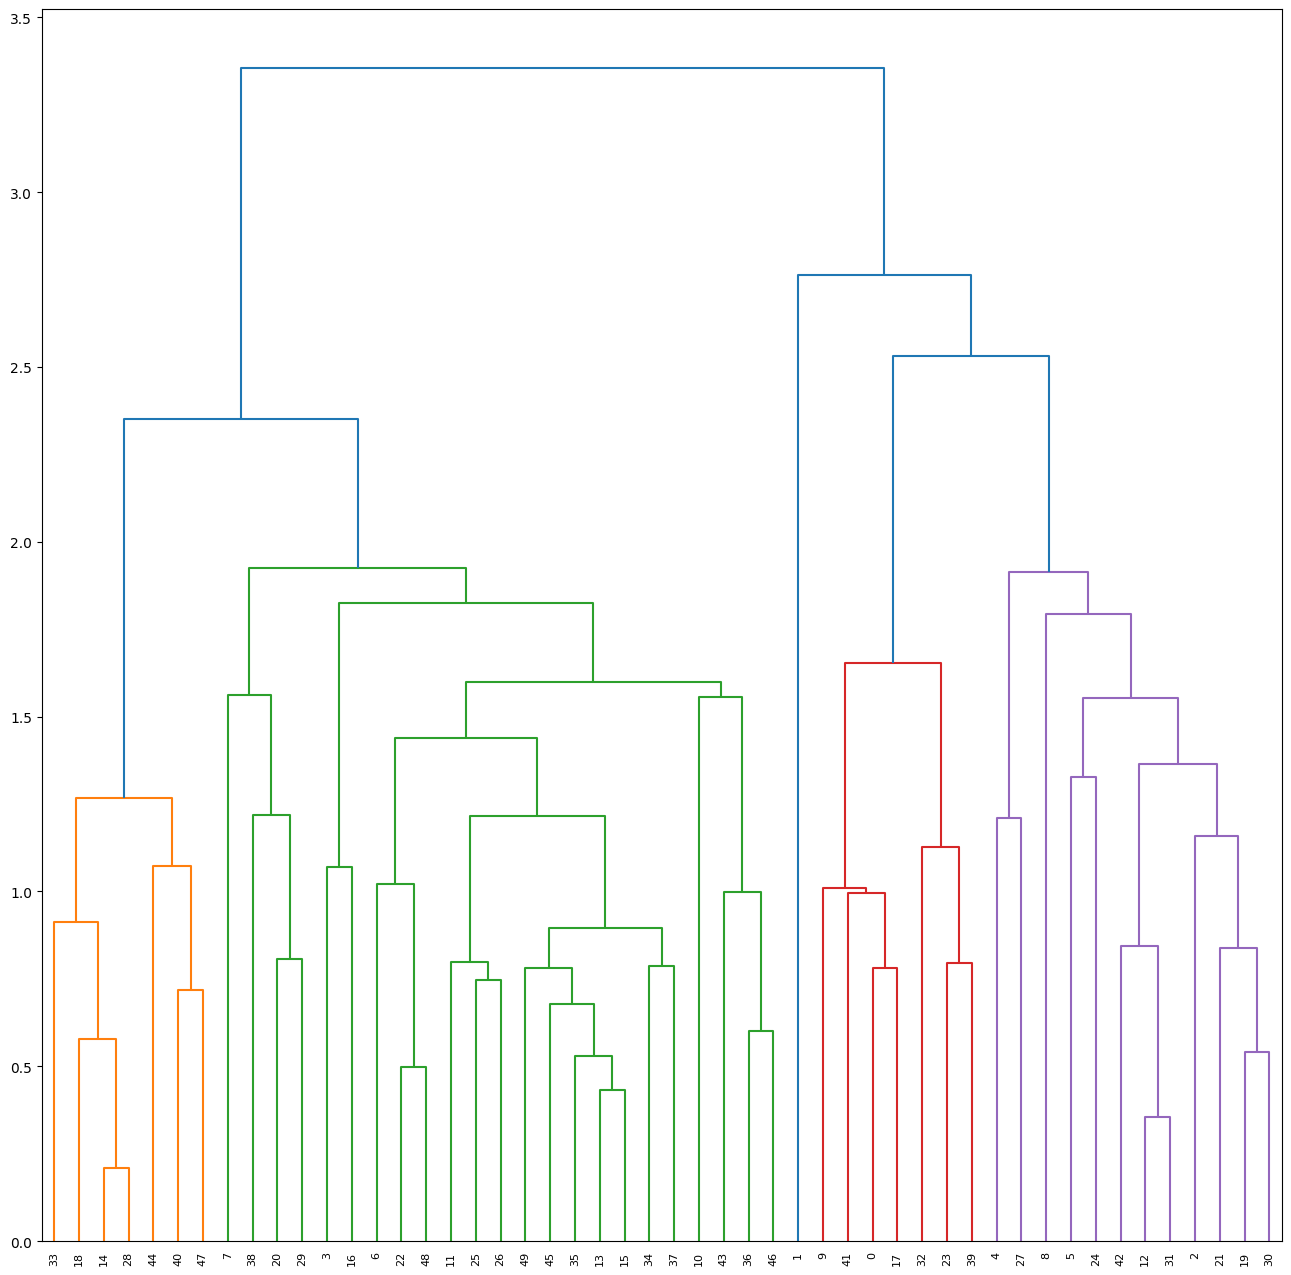

In [29]:
plt.figure(figsize=(16,16))
dendogram=sch.dendrogram(sch.linkage(x,method='average'))



In [30]:
agg_model=AgglomerativeClustering(n_clusters=2,linkage='average',metric='euclidean')
y=agg_model.fit_predict(x)
y

array([0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1], dtype=int64)

In [31]:
silhouette_score(x,y)

0.4084890326217641

# DBScan Clustering

In [32]:
plt.rcParams['figure.figsize']=(15,5)
plt.rcParams['figure.dpi']=250
sns.set_style('darkgrid')
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.neighbors import NearestNeighbors

In [42]:
db=DBSCAN(eps=0.5,min_samples=2)
y=db.fit_predict(x)
y

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  0,  1,  2,  1, -1,
       -1, -1, -1, -1, -1,  3, -1, -1, -1, -1, -1,  2, -1, -1,  0, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  3, -1],
      dtype=int64)

In [43]:
silhouette_score(x,y)

-0.2689925316677858

## Hyperparameter Tunning

In [45]:

def find_optimal_epsilon(X, min_samples, plot=True):
    nn = NearestNeighbors(n_neighbors=min_samples)
    nn.fit(X)
    distances, _ = nn.kneighbors(X)
    distances = np.sort(distances, axis=0)
    distances = distances[:,1]
    
    if plot:
        plt.figure(figsize=(10, 6))
        plt.plot(distances)
        plt.title("Sorted kth distance of each point to its {}th nearest neighbor".format(min_samples))
        plt.xlabel("Points sorted by distance")
        plt.ylabel("{}th nearest neighbor distance".format(min_samples))
        plt.show()
    
    return distances

# Usage example:
# optimal_eps = find_optimal_epsilon(X, min_samples=4)


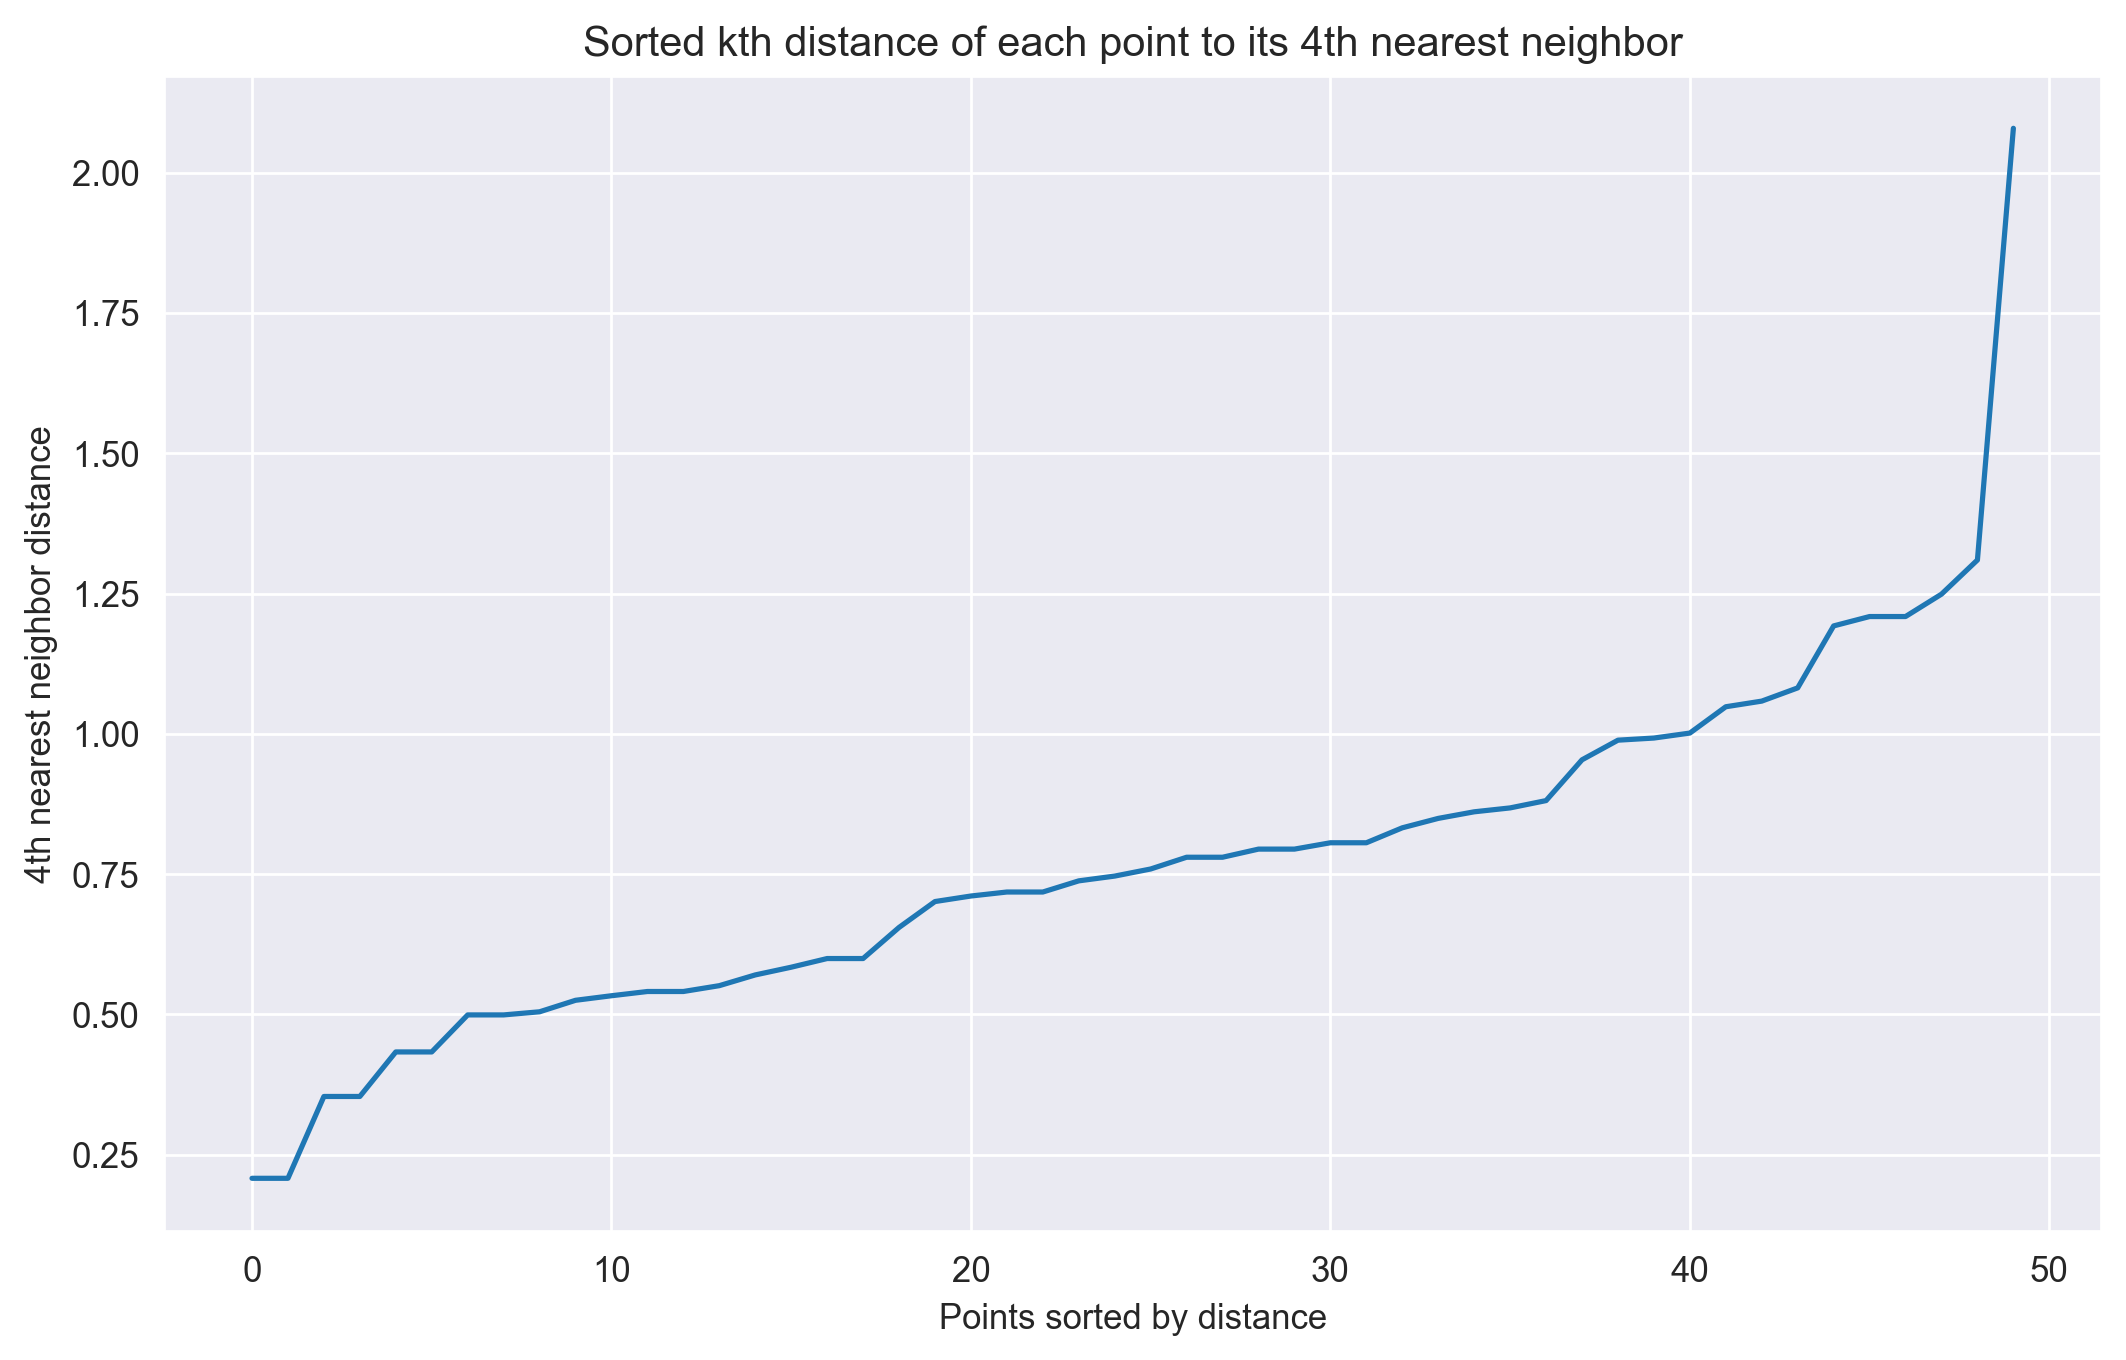

array([0.2079438 , 0.2079438 , 0.35377437, 0.35377437, 0.43312429,
       0.43312429, 0.49909939, 0.49909939, 0.50466926, 0.52515083,
       0.53326883, 0.54082482, 0.54082482, 0.55122406, 0.57035779,
       0.58411812, 0.59956023, 0.59956023, 0.65497312, 0.70111326,
       0.71097658, 0.71809843, 0.71809843, 0.73797792, 0.74649625,
       0.75913104, 0.78006247, 0.78006247, 0.79455301, 0.79455301,
       0.80586349, 0.80586349, 0.83250223, 0.84928467, 0.8610239 ,
       0.86797806, 0.88100359, 0.95367898, 0.98866758, 0.99246041,
       1.0013278 , 1.0482199 , 1.0582674 , 1.08184506, 1.19227586,
       1.20897691, 1.20897691, 1.24886253, 1.30974334, 2.07898369])

In [49]:
find_optimal_epsilon(x,4)

# Creating Final Model

In [50]:
db=DBSCAN(eps=1.3,min_samples=4)
y=db.fit_predict(x)
y

array([ 0, -1,  0,  0, -1,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
      dtype=int64)

In [51]:
silhouette_score(x,y)

0.23506313886168037